# 学習に関するテクニック

# 1. パラメータの更新

* ニューラルネットワークの学習の目的は、**損失関数の値を出来るだけ小さくするパラメータ**を見つけること。  
   これを**「最適化(optimization)」**という。
  
* 最適なパラメータを見つけるために、パラメータの勾配(微分)を手がかりに、パラメータを何度も更新して、最適なパラメータへと近づけていった。  
これを**「確率的勾配降下法(stochastic gradient descent)」、略してSGD**という。

* しかしSGDは単純な方法のため、**SGDよりもスマートな別の最適化手法**が存在する。

## 1.1 SGD

(編集中)

## 1.2 Momentum

(編集中)

## 1.3 AdaGrad

(編集中)

## 1.4 Adam

(編集中)

## 1.5 どの更新手法を用いるか?

(編集中)

## 1.6 MNISTデータ・セットによる更新手法の比較

# 2. 重みの初期化

* ニューラルネットワークの学習で特に重要なのが、**「重みの初期化」**。

* 重みの初期値にどのような値を設定するかで、学習の成否が分かれることが実際によくある。

## 2.1 重みの初期値を0にする?

* 重みの値を小さくすることで、過学習が発生しにくくなる。

* 重みを小さくするためには、初期値を0にするというアイデアが浮かぶが、それは悪いアイデア。

* なぜなら誤差逆伝播法において、全ての重みの値が均一に(同じように)更新されてしまい、たくさんの重みを持つ意味がなくなる。

## 2.2 隠れ層のアクティベーション分布

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def show_activations_hist(weight):
    
    # 1000個のデータ
    x = np.random.randn(1000, 100)
    # 各隠れ層のニューロン数
    node_num = 100
    # 隠れ層の数
    hidden_layer_size = 5
    # アクティベーションの結果
    activations = {}

    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i - 1]

        w = np.random.randn(node_num, node_num) * weight

        z = np.dot(x, w)
        a = sigmoid(z)
        activations[i] = a
    
    # ヒストグラムを描画
    for i, a in activations.items():
        plt.subplot(1, len(activations), i + 1)
        plt.title(str(i + 1) + "-layer")
        plt.hist(a.flatten(), 30, range=(0, 1))
    plt.show()

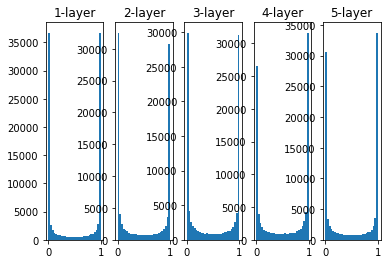

In [5]:
# 重みの標準偏差を1にして、ヒストグラムを描画する。
show_activations_hist(1)

## 勾配消失問題

* 各層のアクティベーションは0と1に偏った分布となっている。

* シグモイド関数の出力が0に近づくにつれて(または1に近づくについて)、その微分の値はゼロに近づく。

* そのため0と1に偏ってデータ分布では、誤差逆伝播法での勾配の値がどんどんと小さくなって消えている。

* 層を深くするディープラーニングではさらに深刻な問題となる。

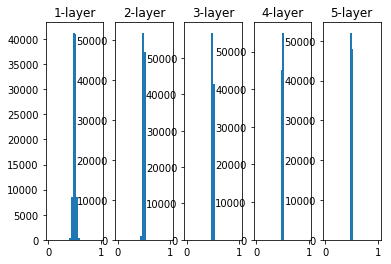

In [11]:
# 重みの標準偏差を0.01にして、ヒストグラムを描画する。
show_activations_hist(0.01)

## 表現力が乏しくなる。

* 各層のアクティベーションは0.5付近に集中した分布となった。

* 偏りはないのいで、勾配消失問題は発生していない。

* ただし、アクティベーションに偏りがあることから、表現力の問題が発生している。

* 複数のニューロンが存在するのに、同じような値を出力するということは、単一のニューロンで表現が出来るため、表現力が乏しくなっている。

## 重みの初期値のベストプラクティス

### 活性化関数にReLUを使う場合は「Heの初期値」

### sigmoidやtanhなどのS字カーブの時は「Xavierの初期値」

## MNISTデータセットによる重み初期化の比較

* 「std = 0.01」は、逆伝播の際に求める勾配が小さくなり、全く学習が進まない。

* 「Xavier」と「He」の初期値の場合は、順調に学習が進む。

===========iteration:0===========
std=0.01:2.3025425523512064
Xavier:2.301227709574678
He:2.350303643931416
===========iteration:100===========
std=0.01:2.301644948200619
Xavier:2.249581535115353
He:1.4958706440811949
===========iteration:200===========
std=0.01:2.3013328966121835
Xavier:2.105597604654001
He:0.7654280169457252
===========iteration:300===========
std=0.01:2.3016058457556317
Xavier:1.7984076415443457
He:0.49247562330912076
===========iteration:400===========
std=0.01:2.300589203486478
Xavier:1.312871363601702
He:0.40635171381621116
===========iteration:500===========
std=0.01:2.2981382455374924
Xavier:0.8809283796364398
He:0.37589386026310356
===========iteration:600===========
std=0.01:2.303917959650488
Xavier:0.6681325126265287
He:0.32536006002798223
===========iteration:700===========
std=0.01:2.2998547728072527
Xavier:0.47113446922738944
He:0.3387685345323151
===========iteration:800===========
std=0.01:2.299142384465822
Xavier:0.5095952754194348
He:0.265677169173790

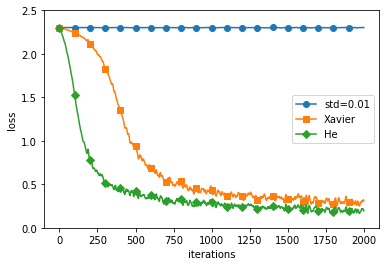

In [6]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 3. Batch Normalization

* 重みの初期値を適切に設定すれば、各層のアクティベーションの分布は適度にバラつき、学習はスムーズに行われる。

* 各層で適度なバラつきを持つように、**「強制的にアクティベーションの分布を調整する」**というアイデアが**Batch Normalization**である。

## 3.1 Batch Normalizationの利点 

* 学習を早く進行させることが出来る。(学習係数を大きくすることが出来る)

* 初期値にそれほど依存しない。(初期値に対して、それほど神経質になる必要がない)

* 過学習を抑制する。(Dropoutなどの必要性を減らす)

============== 1/16 ==============
epoch:0 | 0.116 - 0.117
epoch:1 | 0.117 - 0.119
epoch:2 | 0.117 - 0.14
epoch:3 | 0.117 - 0.174
epoch:4 | 0.117 - 0.197
epoch:5 | 0.117 - 0.216
epoch:6 | 0.117 - 0.241
epoch:7 | 0.117 - 0.272
epoch:8 | 0.117 - 0.288
epoch:9 | 0.117 - 0.305
epoch:10 | 0.117 - 0.329
epoch:11 | 0.117 - 0.345
epoch:12 | 0.117 - 0.36
epoch:13 | 0.117 - 0.371
epoch:14 | 0.117 - 0.391
epoch:15 | 0.117 - 0.405
epoch:16 | 0.117 - 0.417
epoch:17 | 0.117 - 0.438
epoch:18 | 0.117 - 0.456


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.456
============== 2/16 ==============
epoch:0 | 0.092 - 0.09


..\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
..\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\y5a1m\Anaconda3\envs\tf180\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.097 - 0.091
epoch:2 | 0.097 - 0.126
epoch:3 | 0.097 - 0.148
epoch:4 | 0.097 - 0.162
epoch:5 | 0.097 - 0.188
epoch:6 | 0.097 - 0.207
epoch:7 | 0.097 - 0.221
epoch:8 | 0.097 - 0.24
epoch:9 | 0.097 - 0.26
epoch:10 | 0.097 - 0.277
epoch:11 | 0.097 - 0.303
epoch:12 | 0.097 - 0.336
epoch:13 | 0.097 - 0.342
epoch:14 | 0.097 - 0.365
epoch:15 | 0.097 - 0.374
epoch:16 | 0.097 - 0.398
epoch:17 | 0.097 - 0.41
epoch:18 | 0.097 - 0.42


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.439
============== 3/16 ==============
epoch:0 | 0.085 - 0.09
epoch:1 | 0.412 - 0.092
epoch:2 | 0.55 - 0.13
epoch:3 | 0.611 - 0.174
epoch:4 | 0.694 - 0.221
epoch:5 | 0.756 - 0.266
epoch:6 | 0.787 - 0.302
epoch:7 | 0.853 - 0.332
epoch:8 | 0.889 - 0.357
epoch:9 | 0.908 - 0.388
epoch:10 | 0.917 - 0.413
epoch:11 | 0.929 - 0.442
epoch:12 | 0.939 - 0.471
epoch:13 | 0.959 - 0.492
epoch:14 | 0.97 - 0.522
epoch:15 | 0.973 - 0.547
epoch:16 | 0.977 - 0.571
epoch:17 | 0.982 - 0.588
epoch:18 | 0.988 - 0.61


No handles with labels found to put in legend.


epoch:19 | 0.992 - 0.624
============== 4/16 ==============
epoch:0 | 0.103 - 0.109
epoch:1 | 0.247 - 0.116
epoch:2 | 0.379 - 0.152
epoch:3 | 0.461 - 0.219
epoch:4 | 0.515 - 0.264
epoch:5 | 0.56 - 0.324
epoch:6 | 0.603 - 0.383
epoch:7 | 0.634 - 0.451
epoch:8 | 0.675 - 0.512
epoch:9 | 0.695 - 0.559
epoch:10 | 0.72 - 0.598
epoch:11 | 0.749 - 0.624
epoch:12 | 0.767 - 0.657
epoch:13 | 0.783 - 0.672
epoch:14 | 0.796 - 0.699
epoch:15 | 0.81 - 0.724
epoch:16 | 0.82 - 0.738
epoch:17 | 0.835 - 0.75
epoch:18 | 0.851 - 0.768


No handles with labels found to put in legend.


epoch:19 | 0.842 - 0.776
============== 5/16 ==============
epoch:0 | 0.109 - 0.092
epoch:1 | 0.133 - 0.177
epoch:2 | 0.152 - 0.342
epoch:3 | 0.16 - 0.465
epoch:4 | 0.185 - 0.557
epoch:5 | 0.209 - 0.618
epoch:6 | 0.22 - 0.662
epoch:7 | 0.235 - 0.693
epoch:8 | 0.242 - 0.727
epoch:9 | 0.255 - 0.751
epoch:10 | 0.261 - 0.774
epoch:11 | 0.263 - 0.791
epoch:12 | 0.26 - 0.81
epoch:13 | 0.274 - 0.82
epoch:14 | 0.28 - 0.835
epoch:15 | 0.295 - 0.844
epoch:16 | 0.296 - 0.857
epoch:17 | 0.316 - 0.865
epoch:18 | 0.327 - 0.876


No handles with labels found to put in legend.


epoch:19 | 0.337 - 0.882
============== 6/16 ==============
epoch:0 | 0.061 - 0.107
epoch:1 | 0.098 - 0.208
epoch:2 | 0.063 - 0.465
epoch:3 | 0.096 - 0.619
epoch:4 | 0.117 - 0.7
epoch:5 | 0.117 - 0.739
epoch:6 | 0.117 - 0.774
epoch:7 | 0.117 - 0.814
epoch:8 | 0.117 - 0.83
epoch:9 | 0.117 - 0.852
epoch:10 | 0.117 - 0.866
epoch:11 | 0.117 - 0.881
epoch:12 | 0.117 - 0.89
epoch:13 | 0.117 - 0.9
epoch:14 | 0.117 - 0.91
epoch:15 | 0.117 - 0.917
epoch:16 | 0.117 - 0.929
epoch:17 | 0.117 - 0.933
epoch:18 | 0.117 - 0.938


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.947
============== 7/16 ==============
epoch:0 | 0.097 - 0.103
epoch:1 | 0.116 - 0.348
epoch:2 | 0.116 - 0.621
epoch:3 | 0.116 - 0.733
epoch:4 | 0.116 - 0.806
epoch:5 | 0.116 - 0.826
epoch:6 | 0.116 - 0.87
epoch:7 | 0.116 - 0.899
epoch:8 | 0.116 - 0.927
epoch:9 | 0.116 - 0.936
epoch:10 | 0.116 - 0.944
epoch:11 | 0.116 - 0.954
epoch:12 | 0.116 - 0.965
epoch:13 | 0.116 - 0.976
epoch:14 | 0.116 - 0.98
epoch:15 | 0.116 - 0.986
epoch:16 | 0.116 - 0.989
epoch:17 | 0.116 - 0.995
epoch:18 | 0.116 - 0.994


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.995
============== 8/16 ==============
epoch:0 | 0.1 - 0.162
epoch:1 | 0.105 - 0.336
epoch:2 | 0.117 - 0.618
epoch:3 | 0.117 - 0.701
epoch:4 | 0.117 - 0.762
epoch:5 | 0.117 - 0.793
epoch:6 | 0.117 - 0.84
epoch:7 | 0.117 - 0.901
epoch:8 | 0.117 - 0.944
epoch:9 | 0.117 - 0.97
epoch:10 | 0.117 - 0.977
epoch:11 | 0.117 - 0.984
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.994
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.1 - 0.1
epoch:1 | 0.116 - 0.495
epoch:2 | 0.116 - 0.67
epoch:3 | 0.116 - 0.722
epoch:4 | 0.116 - 0.789
epoch:5 | 0.116 - 0.846
epoch:6 | 0.116 - 0.929
epoch:7 | 0.116 - 0.944
epoch:8 | 0.116 - 0.96
epoch:9 | 0.116 - 0.974
epoch:10 | 0.116 - 0.994
epoch:11 | 0.116 - 0.995
epoch:12 | 0.116 - 0.998
epoch:13 | 0.116 - 0.999
epoch:14 | 0.116 - 0.999
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.155
epoch:1 | 0.116 - 0.549
epoch:2 | 0.116 - 0.616
epoch:3 | 0.116 - 0.745
epoch:4 | 0.117 - 0.77
epoch:5 | 0.117 - 0.807
epoch:6 | 0.117 - 0.829
epoch:7 | 0.117 - 0.846
epoch:8 | 0.117 - 0.88
epoch:9 | 0.117 - 0.888
epoch:10 | 0.117 - 0.893
epoch:11 | 0.117 - 0.893
epoch:12 | 0.117 - 0.894
epoch:13 | 0.117 - 0.899
epoch:14 | 0.117 - 0.896
epoch:15 | 0.117 - 0.884
epoch:16 | 0.117 - 0.894
epoch:17 | 0.117 - 0.888
epoch:18 | 0.117 - 0.902


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.902
============== 11/16 ==============
epoch:0 | 0.117 - 0.128
epoch:1 | 0.116 - 0.562
epoch:2 | 0.116 - 0.679
epoch:3 | 0.116 - 0.798
epoch:4 | 0.116 - 0.819
epoch:5 | 0.117 - 0.778
epoch:6 | 0.117 - 0.86
epoch:7 | 0.117 - 0.875
epoch:8 | 0.117 - 0.884
epoch:9 | 0.117 - 0.88
epoch:10 | 0.116 - 0.895
epoch:11 | 0.116 - 0.892
epoch:12 | 0.116 - 0.9
epoch:13 | 0.117 - 0.896
epoch:14 | 0.117 - 0.9
epoch:15 | 0.117 - 0.903
epoch:16 | 0.117 - 0.903
epoch:17 | 0.117 - 0.903
epoch:18 | 0.117 - 0.903


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.875
============== 12/16 ==============
epoch:0 | 0.1 - 0.092
epoch:1 | 0.116 - 0.2
epoch:2 | 0.117 - 0.588
epoch:3 | 0.117 - 0.662
epoch:4 | 0.116 - 0.62
epoch:5 | 0.116 - 0.759
epoch:6 | 0.117 - 0.762
epoch:7 | 0.117 - 0.778
epoch:8 | 0.117 - 0.765
epoch:9 | 0.117 - 0.792
epoch:10 | 0.117 - 0.776
epoch:11 | 0.117 - 0.791
epoch:12 | 0.117 - 0.793
epoch:13 | 0.117 - 0.795
epoch:14 | 0.117 - 0.726
epoch:15 | 0.117 - 0.794
epoch:16 | 0.117 - 0.788
epoch:17 | 0.117 - 0.794
epoch:18 | 0.117 - 0.8


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.805
============== 13/16 ==============
epoch:0 | 0.116 - 0.098
epoch:1 | 0.117 - 0.472
epoch:2 | 0.117 - 0.569
epoch:3 | 0.116 - 0.55
epoch:4 | 0.116 - 0.573
epoch:5 | 0.116 - 0.623
epoch:6 | 0.116 - 0.648
epoch:7 | 0.116 - 0.678
epoch:8 | 0.116 - 0.766
epoch:9 | 0.116 - 0.785
epoch:10 | 0.116 - 0.703
epoch:11 | 0.116 - 0.782
epoch:12 | 0.116 - 0.79
epoch:13 | 0.116 - 0.863
epoch:14 | 0.116 - 0.831
epoch:15 | 0.116 - 0.632
epoch:16 | 0.116 - 0.883
epoch:17 | 0.116 - 0.882
epoch:18 | 0.116 - 0.887


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.9
============== 14/16 ==============
epoch:0 | 0.092 - 0.193
epoch:1 | 0.117 - 0.419
epoch:2 | 0.116 - 0.332
epoch:3 | 0.117 - 0.491
epoch:4 | 0.117 - 0.511
epoch:5 | 0.117 - 0.594
epoch:6 | 0.117 - 0.589
epoch:7 | 0.117 - 0.588
epoch:8 | 0.117 - 0.599
epoch:9 | 0.117 - 0.61
epoch:10 | 0.117 - 0.606
epoch:11 | 0.117 - 0.629
epoch:12 | 0.116 - 0.658
epoch:13 | 0.116 - 0.698
epoch:14 | 0.116 - 0.673
epoch:15 | 0.117 - 0.703
epoch:16 | 0.116 - 0.696
epoch:17 | 0.116 - 0.707
epoch:18 | 0.116 - 0.705


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.71
============== 15/16 ==============
epoch:0 | 0.092 - 0.101
epoch:1 | 0.105 - 0.286
epoch:2 | 0.099 - 0.314
epoch:3 | 0.117 - 0.325
epoch:4 | 0.116 - 0.388
epoch:5 | 0.117 - 0.398
epoch:6 | 0.116 - 0.399
epoch:7 | 0.116 - 0.427
epoch:8 | 0.116 - 0.418
epoch:9 | 0.116 - 0.429
epoch:10 | 0.116 - 0.431
epoch:11 | 0.116 - 0.429
epoch:12 | 0.116 - 0.432
epoch:13 | 0.116 - 0.432
epoch:14 | 0.116 - 0.418
epoch:15 | 0.116 - 0.429
epoch:16 | 0.116 - 0.431
epoch:17 | 0.116 - 0.433
epoch:18 | 0.116 - 0.433


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.432
============== 16/16 ==============
epoch:0 | 0.105 - 0.105
epoch:1 | 0.116 - 0.211
epoch:2 | 0.117 - 0.285
epoch:3 | 0.117 - 0.312
epoch:4 | 0.117 - 0.308
epoch:5 | 0.117 - 0.314
epoch:6 | 0.117 - 0.315
epoch:7 | 0.117 - 0.262
epoch:8 | 0.117 - 0.323
epoch:9 | 0.117 - 0.326
epoch:10 | 0.117 - 0.32
epoch:11 | 0.117 - 0.323
epoch:12 | 0.117 - 0.326
epoch:13 | 0.117 - 0.327
epoch:14 | 0.117 - 0.326
epoch:15 | 0.117 - 0.323
epoch:16 | 0.117 - 0.326
epoch:17 | 0.117 - 0.327
epoch:18 | 0.117 - 0.327
epoch:19 | 0.117 - 0.329


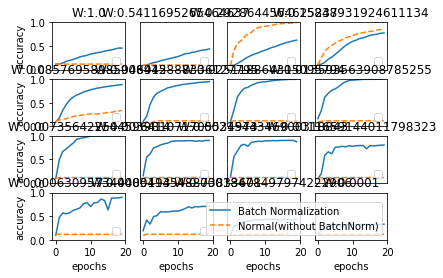

In [7]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

# 4. 正則化

* 機械学習の問題では、**過学習**が問題になることが多くある。

* 過学習とは、訓練データだけに適応し過ぎてしまい、訓練データに含まれない他のデータにはうまく対応出来ない状態を指す。

* 機械学習で目指すことは、汎化性能であり、未知のデータでも正しく識別出来ることが求められる。

## 4.1 過学習

過学習が発生する原因として、主に次の2点が挙げられる。

* パラメータを大量に持ち、表現力の高いモデルであること。

* 訓練データが少ないこと。

epoch:0, train acc:0.08, test acc:0.0887
epoch:1, train acc:0.07666666666666666, test acc:0.0933
epoch:2, train acc:0.08666666666666667, test acc:0.0996
epoch:3, train acc:0.11, test acc:0.1161
epoch:4, train acc:0.14, test acc:0.1318
epoch:5, train acc:0.17666666666666667, test acc:0.1516
epoch:6, train acc:0.20333333333333334, test acc:0.1647
epoch:7, train acc:0.24666666666666667, test acc:0.1838
epoch:8, train acc:0.2633333333333333, test acc:0.2013
epoch:9, train acc:0.2966666666666667, test acc:0.2143
epoch:10, train acc:0.32, test acc:0.2279
epoch:11, train acc:0.36666666666666664, test acc:0.2389
epoch:12, train acc:0.39, test acc:0.2538
epoch:13, train acc:0.38, test acc:0.2575
epoch:14, train acc:0.3933333333333333, test acc:0.2688
epoch:15, train acc:0.42333333333333334, test acc:0.2925
epoch:16, train acc:0.4533333333333333, test acc:0.3078
epoch:17, train acc:0.4766666666666667, test acc:0.32
epoch:18, train acc:0.4866666666666667, test acc:0.3273
epoch:19, train acc:0.503

epoch:157, train acc:0.8733333333333333, test acc:0.6933
epoch:158, train acc:0.8533333333333334, test acc:0.6852
epoch:159, train acc:0.85, test acc:0.6796
epoch:160, train acc:0.8466666666666667, test acc:0.6817
epoch:161, train acc:0.8566666666666667, test acc:0.689
epoch:162, train acc:0.85, test acc:0.6799
epoch:163, train acc:0.8533333333333334, test acc:0.68
epoch:164, train acc:0.8633333333333333, test acc:0.6847
epoch:165, train acc:0.8633333333333333, test acc:0.6866
epoch:166, train acc:0.8733333333333333, test acc:0.6963
epoch:167, train acc:0.8666666666666667, test acc:0.6948
epoch:168, train acc:0.86, test acc:0.6846
epoch:169, train acc:0.86, test acc:0.6875
epoch:170, train acc:0.86, test acc:0.6872
epoch:171, train acc:0.8533333333333334, test acc:0.6848
epoch:172, train acc:0.8666666666666667, test acc:0.692
epoch:173, train acc:0.8633333333333333, test acc:0.6829
epoch:174, train acc:0.87, test acc:0.6971
epoch:175, train acc:0.8666666666666667, test acc:0.6938
epoch

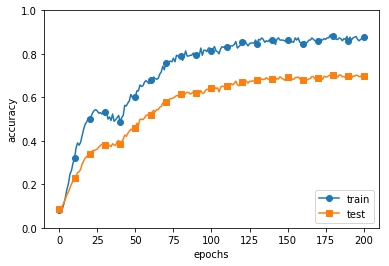

In [8]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 4.2 Weight decay

* 学習の過程において、大きな重みを持つことに対してペナルティを課すことで、過学習を抑制しようとするもの。

## 4.3 Dropout

* ニューロンをランダムに消去しながら学習する手法。

* 消去されたニューロンは、信号の伝達が行われない。

# 5. ハイパーパラメータの検証

* ニューラルネットワークでは、重みやバイアスといったパラメータとは別に、ハイパーパラメータが多く存在する。

* ハイパーパラメータとは、例えば各層のニューロンの数やバッチサイズ、パラメータを更新する際の学習係数や、Weight decayなどを指す。

* ハイパーパラメータの値を決定することは、一般的に多くの試行錯誤が伴う。

# 6. まとめ

* パラメータの更新方法には、SGDの他に、有名なものとして、MomenturmやAdaGrad、Adamなどの手法がある。

* 重みの初期値の与え方は、正しい学習を行う上で非常に重量な問題である。

* 重みの初期値として、「Xavierの初期値」や「Heの初期値」などが有名である。

* 「BatchNormalization」を用いることで、学習を早く進めることが出来る。

* 過学習を抑制するための正則化の技術として、Weight decayやDropoutがある。

* ハイパーパラメータの探索は、良い値が存在する範囲を徐々に絞りながら進めるのが効率の良い方法である。